# QUESTION 1

**Restricted Boltzmann Machine:**

Let the visible features be called **x** and the hidden features be called **h** .

The network of weights between them is **W** with the biases **c** and **b** are associated with the visible and hidden features respectively.

Moving on we define **energy** over x and h as:

$E(\mathbf{x}, \mathbf{h}) =-\mathbf{h}^{\top} \mathbf{W} \mathbf{x}-\mathbf{c}^{\top} \mathbf{x}-\mathbf{b}^{\top} \mathbf{h} \\ =-\sum_{j} \sum_{k} W_{j, k} h_{j} x_{k}-\sum_{k} c_{k} x_{k}-\sum_{j} b_{j} h_{j}$

The free energy will therefore be:
$\mathcal{F}(x)= - c'x - \sum_i \log \sum_{h_i} e^{h_i (b_i + W_i x)}$

The joint probability over x and h will be:

$p(\mathbf{x}, \mathbf{h}) =\exp (-E(\mathbf{x}, \mathbf{h})) / Z \\ =\exp (\mathbf{h}^{T} \mathbf{W} \mathbf{x}+\mathbf{c}^{T} \mathbf{x}+\mathbf{b}^{T} \mathbf{h}) / Z \\=\exp \left(\mathbf{h}^{\top} \mathbf{W} \mathbf{x}) \exp(\mathbf{c}^{T} \mathbf{x}) \exp (\mathbf{b}^{T} \mathbf{h}) / Z \\ =\prod_{j} \prod_{k} \exp (W_{j, k} h_{j} x_{k}\right) \prod_{k} \exp (c_{k} x_{k}) \prod_{j} \exp (b_{j} h_{j})$


Markov structure of an Binary RBM is:

$p(\mathbf{h} | \mathbf{x}) =\prod_{j} p(h_{j} | \mathbf{x})$


$p(h_{j}=1 | \mathbf{x}) =\frac{1}{1+\exp (-(b_{j}+\mathbf{W}_{j} \mathbf{x}))}$

$=\sigma(b_{j}+\mathbf{W}_{j} \mathbf{x})$


$p(\mathbf{x} | \mathbf{h}) =\prod_{k} p(x_{k} | \mathbf{h})$


$p(x_{k}=1 | \mathbf{h}) =\frac{1}{1+\exp (-(c_{k}+\mathbf{W}_{k} \mathbf{h}))}$

$=\sigma(c_{k}+\mathbf{W}_{k} \mathbf{h})$

Thus the Free energy term reduces to:

$\mathcal{F}(x)= - c'x - \sum_i \log(1 + e^{(b_i + W_i x)})$


The loss we aim to minimize is negative log likelihood:

$\frac{1}{T} \sum_{t} -\log p(\mathbf{x}^{(t)})$

where T is the number of training examples.

$p(\mathbf{x}) =\sum_{\mathbf{h} \in\{0,1\}^{H}} p(\mathbf{x}, \mathbf{h})=\sum_{\mathbf{h} \in\{0,1\}^{H}} \exp (-E(\mathbf{x}, \mathbf{h})) / Z$

Let $\theta$ be all the trainable weights and biases i.e. W,c and b.
Then on taking gradient we get:

$\mathbf{\frac{\partial -log\ p(x;\theta)}{\partial \theta}
= -\frac{\partial log \sum_h e^{-E(x,h)}}{\partial \theta} + \frac{\partial log\ Z}{\partial \theta}}$


For **postive phase**:

$-\frac{\partial log \sum_h e^{-E(x,h)}}{\partial \theta}
= - \frac{1}{\sum_h e^{-E(x,h)}} \sum_h \frac{\partial e^{-E(x,h)}}{\partial \theta}
= -\frac{1}{\sum_h e^{-E(x,h)}} \sum_h e^{-E(x,h)} \frac{\partial -E(x,h)}{\partial \theta}$

Then we move the first fraction into the summation and keep applying chain rule so that the negative sign could be cancelled out:

$\sum_h \frac{e^{-E(x,h)}}{\sum_h e^{-E(x,h)}} \frac{\partial E(x,h)}{\partial \theta}$

Dividing Z from numerator and denominator of the first fraction simutaneouly :


$\sum_h \frac{\frac{e^{-E(x,h)}}{Z}}{\frac{\sum_h e^{-E(x,h)}}{Z}} \frac{\partial E(x,h)}{\partial \theta}
= \sum_h \frac{P(x,h)}{P(x)}\frac{\partial E(x,h)}{\partial \theta}
= \sum_h P(h|x) \frac{\partial E(x,h)}{\partial \theta}$

This gives us the final form of positive phase:

$E_{h \sim P(h|x)} \frac{\partial E(x,h)}{\partial \theta}$

Now for **negative phase** :

$\frac{\partial log\ Z}{\partial \theta} = \frac{1}{Z} \frac{\partial Z}{\partial \theta}$

Substituting $Z=\sum_{x,h} e^{-E(x,h)}$ and applying chain rule:

$= \frac{1}{Z} \sum_{h',x'} \frac{\partial e^{-E(h',x')}}{\partial \theta}
= \frac{1}{Z} \sum_{h',x'} e^{-E(h',x')} \frac{\partial -E(h',x')}{\partial \theta}
= -\frac{1}{Z} \sum_{h',x'} e^{-E(h',x')} \frac{\partial E(h',x')}{\partial \theta}$

Moving first fraction into summation so that we can use definition of joint distribution:

$= -\sum_{h',x'} \frac{e^{-E(h',x')}}{Z} \frac{\partial E(h',x')}{\partial \theta}
= -\sum_{h',x'} P(h',x') \frac{\partial E(h',x')}{\partial \theta}$

Thus final form of negative phase:

$-E_{h',x' \sim P(h,x)} \frac{\partial E(h',x')}{\partial \theta}$

Thus the learning rule obtained is:

$\mathbf{\frac{\partial -log\ P(x;\theta)}{\partial \theta}
= E_{h \sim P(h|x)} \frac{\partial E(x,h)}{\partial \theta} - E_{h',x' \sim P(h,x)} \frac{\partial E(h',x')}{\partial \theta}}$

The problem arises with the negative phase being intractible.

To solve this we use **Contrastive Divergence** algorithm.

Replace estimation over $(\mathbf x)$ by a point estimation at $\tilde{\mathbf x}\sim p(\mathbf x)$ obtained from Gibbs sampling starting at $\mathbf x^{(t)}$


$\mathbf{\frac{\partial-log\ P(x;\theta)}{\partial \theta}= E_{\mathbf{h}} [\frac{\partial E(\mathbf{x}^{(t)}, \mathbf{h})}{\partial \theta} | \mathbf{x}^{(t)}]-E_{\mathbf{x}, \mathbf{h}} [\frac{\partial E(\mathbf{x}, \mathbf{h})}{\partial \theta}] \\
=E_{\mathbf{h}}[\frac{\partial E(\mathbf{x}^{(t)}, \mathbf{h})}{\partial \theta} | \mathbf{x}^{(t)}]-E_{\mathbf{h}}[\frac{\partial E(\tilde{\mathbf{x}}, \mathbf{h})}{\partial \theta}]}$

The parameters updation rule will thus be:

$\theta(t) = \theta(t-1) + \alpha \frac{\partial log\ P(x)}{\partial \theta(t-1)}$

where $\alpha$ is the learning rate.

$\mathbf{W}=\mathbf{W}+\alpha(\mathbf{h}(\mathbf{x}^{(t)}) \mathbf{x}^{(t)^{T}}-\mathbf{h}(\tilde{\mathbf{x}}) \tilde{\mathbf{x}}^{T})$

$\mathbf{b} = \mathbf{b}+\alpha(\mathbf{h}(\mathbf{x}^{(t)})-\mathbf{h}(\tilde{\mathbf{x}}))$


$\mathbf{c} =\mathbf{c}+\alpha(\mathbf{x}^{(t)}-\tilde{\mathbf{x})}$

where $\mathbf h(\mathbf x) = p(\mathbf h|\mathbf x)$.









In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import keras.datasets as kd

Using TensorFlow backend.


In [0]:
import random

class DataSet:
    batch_index = 0
    
    def __init__(self, dir_testtrain, batch_size = None, one_hot = False, seed = 0):

        (x_train, y_train), (x_test, y_test) = kd.mnist.load_data()      
        if dir_testtrain=='train':
            X,Y=x_train,y_train
        elif dir_testtrain=='test':
            X,Y=x_test,y_test
        
        shape = X.shape
        X = X.reshape([shape[0], shape[1] * shape[2]])
        self.X = X.astype(np.float)/255
        self.size = self.X.shape[0]
        if batch_size == None:
            self.batch_size = self.size
        else:
            self.batch_size = batch_size
        # abandom last few samples
        self.batch_num = int(self.size / self.batch_size)
        # shuffle samples
        np.random.seed(seed)
        np.random.shuffle(self.X)
        np.random.seed(seed)
        np.random.shuffle(Y)
        self.one_hot = one_hot
        if one_hot:
            y_vec = np.zeros((len(Y), 10), dtype=np.float)
            for i, label in enumerate(Y):
                y_vec[i, Y[i]] = 1.0
            self.Y = y_vec
        else:
            self.Y = Y
    
    
    def next_batch(self):
        start = self.batch_index * self.batch_size
        end = (self.batch_index + 1) * self.batch_size
        self.batch_index = (self.batch_index + 1) % self.batch_num
        if self.one_hot:
            return self.X[start:end, :], self.Y[start:end, :]
        else:
            return self.X[start:end, :], self.Y[start:end]
        
    def sample_batch(self):
        index = random.randrange(self.batch_num)
        start = index * self.batch_size
        end = (index + 1) * self.batch_size
        if self.one_hot:
            return self.X[start:end, :], self.Y[start:end, :]
        else:
            return self.X[start:end, :], self.Y[start:end]

In [0]:
def weight(shape, name='weights'):
    return tf.Variable(tf.random.truncated_normal(shape, stddev=0.1), name=name)

def bias(shape, name='biases'):
    return tf.Variable(tf.constant(0.1, shape=shape), name=name)


In [0]:
class RBM:
    i = 0 # fliping index for computing pseudo likelihood
    
    def __init__(self, n_hidden,n_visible=784, k=30, momentum=False):
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.k = k
        
        self.lr = tf.compat.v1.placeholder(tf.float32)
        if momentum:
            self.momentum = tf.compat.v1.placeholder(tf.float32)
        else:
            self.momentum = 0.0
        self.w = weight([n_visible, n_hidden], 'w')
        self.hb = bias([n_hidden], 'hb')
        self.vb = bias([n_visible], 'vb')
        
        self.w_v = tf.Variable(tf.zeros([n_visible, n_hidden]), dtype=tf.float32)
        self.hb_v = tf.Variable(tf.zeros([n_hidden]), dtype=tf.float32)
        self.vb_v = tf.Variable(tf.zeros([n_visible]), dtype=tf.float32)
        
    def propup(self, visible):
        pre_sigmoid_activation = tf.matmul(visible, self.w) + self.hb
        return tf.nn.sigmoid(pre_sigmoid_activation)
    
    def propdown(self, hidden):
        pre_sigmoid_activation = tf.matmul(hidden, tf.transpose(self.w)) + self.vb
        return tf.nn.sigmoid(pre_sigmoid_activation)
    
    def sample_h_given_v(self, v_sample):
        h_props = self.propup(v_sample)
        h_sample = tf.nn.relu(tf.sign(h_props - tf.random.uniform(tf.shape(h_props))))
        return h_sample
    
    def sample_v_given_h(self, h_sample):
        v_props = self.propdown(h_sample)
        v_sample = tf.nn.relu(tf.sign(v_props - tf.random.uniform(tf.shape(v_props))))
        return v_sample
    
    def CD_k(self, visibles):       
        # k steps gibbs sampling
        v_samples = visibles
        h_samples = self.sample_h_given_v(v_samples)
        for i in range(self.k):
            v_samples = self.sample_v_given_h(h_samples)
            h_samples = self.sample_h_given_v(v_samples)
        
        h0_props = self.propup(visibles)
        w_positive_grad = tf.matmul(tf.transpose(visibles), h0_props)
        w_negative_grad = tf.matmul(tf.transpose(v_samples), h_samples)
        w_grad = (w_positive_grad - w_negative_grad) / tf.cast(tf.shape(visibles)[0],dtype=tf.float32)
        hb_grad = tf.reduce_mean(h0_props - h_samples, 0)
        vb_grad = tf.reduce_mean(visibles - v_samples, 0)
        return w_grad, hb_grad, vb_grad
    
    def learn(self, visibles):
        w_grad, hb_grad, vb_grad = self.CD_k(visibles)
        # compute new velocities
        new_w_v = self.momentum * self.w_v + self.lr * w_grad
        new_hb_v = self.momentum * self.hb_v + self.lr * hb_grad
        new_vb_v = self.momentum * self.vb_v + self.lr * vb_grad
        # update parameters
        update_w = tf.compat.v1.assign(self.w, self.w + new_w_v)
        update_hb = tf.compat.v1.assign(self.hb, self.hb + new_hb_v)
        update_vb = tf.compat.v1.assign(self.vb, self.vb + new_vb_v)
        # update velocities
        update_w_v = tf.compat.v1.assign(self.w_v, new_w_v)
        update_hb_v = tf.compat.v1.assign(self.hb_v, new_hb_v)
        update_vb_v = tf.compat.v1.assign(self.vb_v, new_vb_v)
        
        return [update_w, update_hb, update_vb, update_w_v, update_hb_v, update_vb_v]
        
    def sampler(self, visibles, steps=300):
        v_samples = visibles
        for step in range(steps):
            v_samples = self.sample_v_given_h(self.sample_h_given_v(v_samples))
        return v_samples
    
    def free_energy(self, visibles):
        first_term = tf.matmul(visibles, tf.reshape(self.vb, [tf.shape(self.vb)[0], 1]))
        second_term = tf.reduce_sum(tf.math.log(1 + tf.exp(self.hb + tf.matmul(visibles, self.w))), axis=1)
        return - first_term - second_term
    
    def pseudo_likelihood(self, visibles):
        x = tf.round(visibles)
        x_fe = self.free_energy(x)
        split0, split1, split2 = tf.split(x, [self.i, 1, tf.shape(x)[1] - self.i - 1], 1)
        xi = tf.concat([split0, 1 - split1, split2], 1)
        self.i = (self.i + 1) % self.n_visible
        xi_fe = self.free_energy(xi)
        return tf.reduce_mean(self.n_visible * tf.math.log(tf.nn.sigmoid(xi_fe - x_fe)), axis=0)

In [0]:
import imageio
import matplotlib.pyplot as plt

def save_images(images, size, path):
    
    
    img = (images + 1.0) / 2.0
    h, w = img.shape[1], img.shape[2]
    
   
    merge_img = np.zeros((h * size[0], w * size[1]))
    
    
    for idx, image in enumerate(images):
        i = idx % size[1]
        j = idx // size[1]
        merge_img[j*h:j*h+h, i*w:i*w+w] = image

    #merge_img=merge_img.astype(np.uint8)
    formatted = (merge_img * 255 / np.max(merge_img)).astype('uint8')
    plt.imshow(formatted, cmap='Greys_r')
    plt.show()


        
    
    return imageio.imwrite(path, formatted)

In [0]:
def test_after_removing(percent,x_test):

  print('Removing ',percent*100,'% Pixels..')

  for j in range(len(x_test)):
            ll=x_test[j]
            i,= np.nonzero(ll)
            ix = np.random.choice(i, int(np.floor(percent * len(i))),replace=False)
            for loc in ix:
              x_test[j][loc]=0.0

  return x_test



In [0]:
def train(train_data, epochs,hidden):
    samples_dir = './samples'
    
    x = tf.compat.v1.placeholder(tf.float32, shape=[None, 784])
    noise_x, _ = train_data.sample_batch()
    # noise_x = tf.random_normal([train_data.batch_size, 784])
    rbm = RBM(hidden)
    step = rbm.learn(x)
    sampler = rbm.sampler(x)
    pl = rbm.pseudo_likelihood(x)
    
    saver = tf.compat.v1.train.Saver()
    
    with tf.compat.v1.Session() as sess:
        init = tf.compat.v1.global_variables_initializer()
        sess.run(init)
        epoch = 1
        for i in range(epochs * train_data.batch_num):
            # draw samples
            if (epoch-1) % 5==0 and train_data.batch_index is 0:
                samples = sess.run(sampler, feed_dict = {x: noise_x})
                samples = samples.reshape([train_data.batch_size, 28, 28])
                save_images(samples, [8, 8], os.path.join(samples_dir, 'iteration_%d.png' % i))
                print('Saved samples.')
            batch_x, _ = train_data.next_batch()
            sess.run(step, feed_dict = {x: batch_x, rbm.lr: 0.1})
            
            if i is not 0 and train_data.batch_index is 0:
                print('Epoch ',epoch,' Done !')                
                epoch += 1
        print('Testing Part...')       

        x_test,_=test_data.sample_batch()
        x_test=test_after_removing(0.20,x_test)
        samples = sess.run(sampler, feed_dict = {x: x_test})
        samples = samples.reshape([train_data.batch_size, 28, 28])
        save_images(samples, [8, 8], os.path.join(samples_dir, 'test20removed.png'))


        x_test,_=test_data.sample_batch()
        x_test=test_after_removing(0.50,x_test)
        samples = sess.run(sampler, feed_dict = {x: x_test})
        samples = samples.reshape([train_data.batch_size, 28, 28])
        save_images(samples, [8, 8], os.path.join(samples_dir, 'test50removed.png'))


        x_test=test_after_removing(0.80,x_test)
        samples = sess.run(sampler, feed_dict = {x: x_test})
        samples = samples.reshape([train_data.batch_size, 28, 28])
        save_images(samples, [8, 8], os.path.join(samples_dir, 'test80removed.png'))

        

        

In [0]:
train_data = DataSet('train', batch_size=64, one_hot=True)
test_data = DataSet('test', batch_size=64, one_hot=True)

**20 hidden nodes with testing by removing 20%, 50% and 80% pixels**

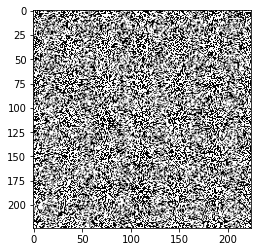

Saved samples.
Epoch  1  Done !
Epoch  2  Done !
Epoch  3  Done !
Epoch  4  Done !
Epoch  5  Done !


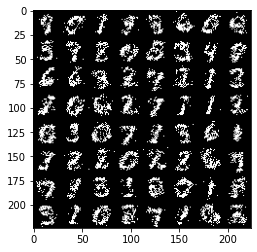

Saved samples.
Epoch  6  Done !
Epoch  7  Done !
Epoch  8  Done !
Epoch  9  Done !
Epoch  10  Done !


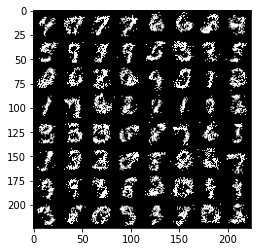

Saved samples.
Epoch  11  Done !
Epoch  12  Done !
Epoch  13  Done !
Epoch  14  Done !
Epoch  15  Done !


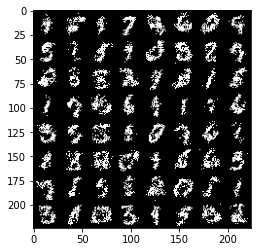

Saved samples.
Epoch  16  Done !
Epoch  17  Done !
Epoch  18  Done !
Epoch  19  Done !
Epoch  20  Done !


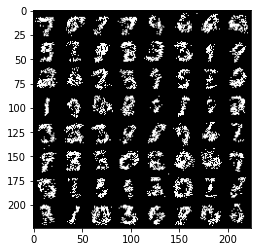

Saved samples.
Epoch  21  Done !
Epoch  22  Done !
Epoch  23  Done !
Epoch  24  Done !
Epoch  25  Done !


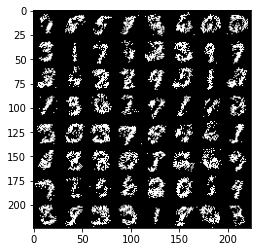

Saved samples.
Epoch  26  Done !
Epoch  27  Done !
Epoch  28  Done !
Epoch  29  Done !
Epoch  30  Done !
Testing Part...
Removing  20.0 % Pixels..


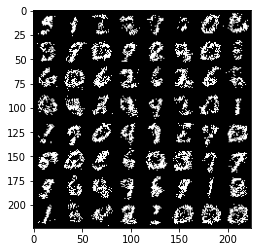

Removing  50.0 % Pixels..


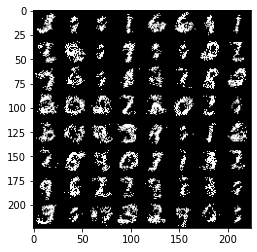

Removing  80.0 % Pixels..


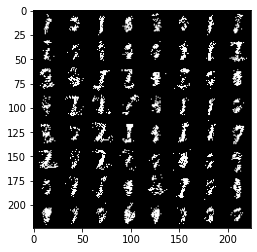

In [20]:
tf.compat.v1.disable_eager_execution()
train(train_data, 30,20)

**100 hidden nodes with testing by removing 20%, 50% and 80% pixels**

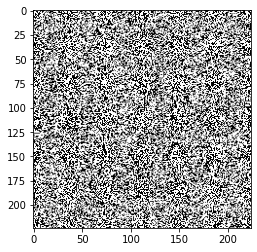

Saved samples.
Epoch  1  Done !
Epoch  2  Done !
Epoch  3  Done !
Epoch  4  Done !
Epoch  5  Done !


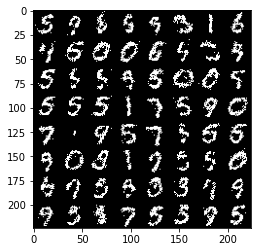

Saved samples.
Epoch  6  Done !
Epoch  7  Done !
Epoch  8  Done !
Epoch  9  Done !
Epoch  10  Done !


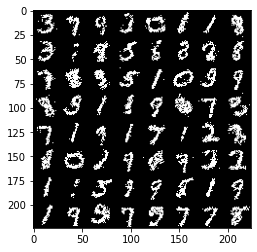

Saved samples.
Epoch  11  Done !
Epoch  12  Done !
Epoch  13  Done !
Epoch  14  Done !
Epoch  15  Done !


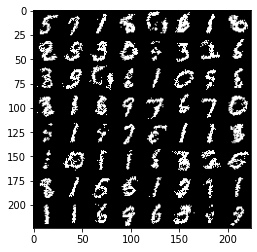

Saved samples.
Epoch  16  Done !
Epoch  17  Done !
Epoch  18  Done !
Epoch  19  Done !
Epoch  20  Done !


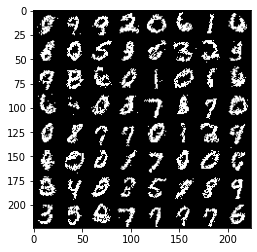

Saved samples.
Epoch  21  Done !
Epoch  22  Done !
Epoch  23  Done !
Epoch  24  Done !
Epoch  25  Done !


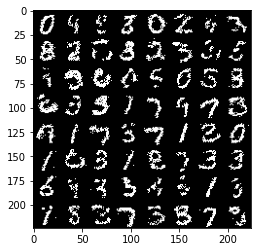

Saved samples.
Epoch  26  Done !
Epoch  27  Done !
Epoch  28  Done !
Epoch  29  Done !
Epoch  30  Done !
Testing Part...
Removing  20.0 % Pixels..


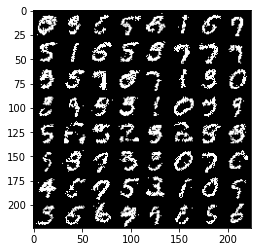

Removing  50.0 % Pixels..


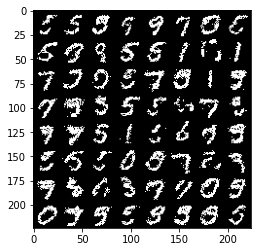

Removing  80.0 % Pixels..


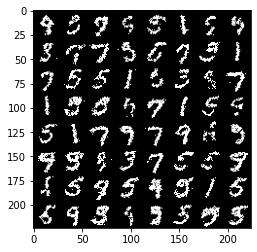

In [25]:
tf.compat.v1.disable_eager_execution()
train(train_data, 30,100)

**500 hidden nodes with testing by removing 20%, 50% and 80% pixels**

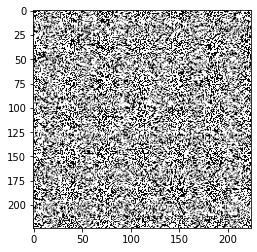

Saved samples.
Epoch  1  Done !
Epoch  2  Done !
Epoch  3  Done !
Epoch  4  Done !
Epoch  5  Done !


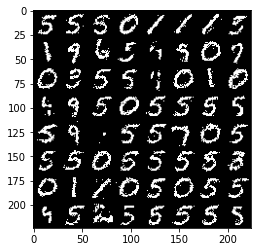

Saved samples.
Epoch  6  Done !
Epoch  7  Done !
Epoch  8  Done !
Epoch  9  Done !
Epoch  10  Done !


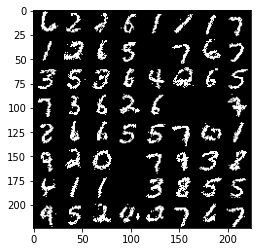

Saved samples.
Epoch  11  Done !
Epoch  12  Done !
Epoch  13  Done !
Epoch  14  Done !
Epoch  15  Done !


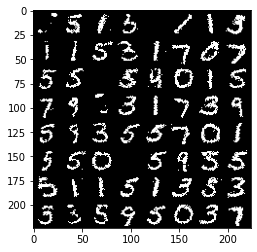

Saved samples.
Epoch  16  Done !
Epoch  17  Done !
Epoch  18  Done !
Epoch  19  Done !
Epoch  20  Done !


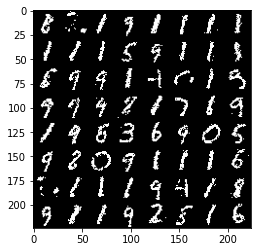

Saved samples.
Epoch  21  Done !
Epoch  22  Done !
Epoch  23  Done !
Epoch  24  Done !
Epoch  25  Done !


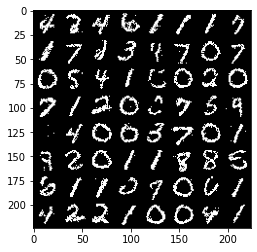

Saved samples.
Epoch  26  Done !
Epoch  27  Done !
Epoch  28  Done !
Epoch  29  Done !
Epoch  30  Done !
Testing Part...
Removing  20.0 % Pixels..


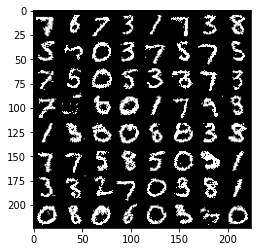

Removing  50.0 % Pixels..


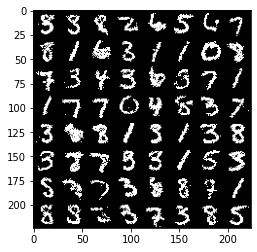

Removing  80.0 % Pixels..


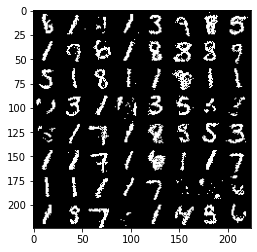

In [26]:
tf.compat.v1.disable_eager_execution()
#tf.disable_v2_behavior()
train(train_data, 30,500)

**Reference**

http://lyy1994.github.io/machine-learning/2017/04/17/RBM-tensorflow-implementation.html

http://lyy1994.github.io/machine-learning/2017/03/16/EBM-Notes.html

# QUESTION 2

**VAE derivation:**

Before proceeding with the derivation let's define some notations:

$X$:   data that we want to model <br />
$z$ :   latent variable <br />
$P(X)$:   probability distribution of the data <br />
$P(z)$:   probability distribution of latent variable <br />
$P(X|z)$:   distribution of generating data given latent variable <br />

Since we want to model the data we aim at finding P(X)

$P(X) = \int P(X \vert z) P(z) dz$

However the problem arises that the integral is intractible. So we aim to approximate $P(z|X)$ by $Q(z|X)$ using **variational inference**.

The **KL Divergence** between both these probabilities can be written as:


$D_{KL}Q(z \vert X) \Vert P(z \vert X) = \sum_z Q(z \vert X) \, \log \frac{Q(z \vert X)}{P(z \vert X)} \\
                            = E [ \log \frac{Q(z \vert X)}{P(z \vert X)}] \\
                            = E[\log Q(z \vert X) - \log P(z \vert X)]$
                            
Using Bayes Rule and moving terms independent of z outside we get:


$D_{KL}Q(z \vert X) \Vert P(z \vert X) = E[\log Q(z \vert X) - \log \frac{P(X \vert z) P(z)}{P(X)})]\\
                                      = E[\log Q(z \vert X) - \log P(X \vert z) - \log P(z) + \log P(X)]$
                                      
$D_{KL}[Q(z \vert X) \Vert P(z \vert X)] - \log P(X) = E[\log Q(z \vert X) - \log P(X \vert z) - \log P(z)]$

We can replace the right hand side with another KL Divergence term:

$\log P(X) - D_{KL}[Q(z \vert X) \Vert P(z \vert X)] = E[\log P(X \vert z) - (\log Q(z \vert X) - \log P(z))] \\
                                       = E[\log P(X \vert z)] - E[\log Q(z \vert X) - \log P(z)] \\
                                       = E[\log P(X \vert z)] - D_{KL}[Q(z \vert X) \Vert P(z)]$

This gives us the **VAE objective function**:

$\log P(X) - D_{KL}[Q(z \vert X) \Vert P(z \vert X)] = E[\log P(X \vert z)] - D_{KL}[Q(z \vert X) \Vert P(z)]$

Thus we need to follow the following 3 steps:

1. Generate $Q(z|X)$ by transforming data X into z (Encoder part of VAE).
2. Learn $P(z)$ i.e. distribution of latent variable.
3. Generate new data from z $P(X|z)$ (Decoder part of VAE).

Maximizing $E[\log P(X \vert z)]$ is a maximum likelihood estimation. However for the other term $D_{KL}[Q(z \vert X) \Vert P(z)]$, $P(z)$ is the latent variable distribution. When sampling $P(z)$ the easiest choice is N(0,1). Hence, $Q(z|X)$ must be close to N(0,1). 

This also makes the KL divergence term in closed form:

$D_{KL}[N(\mu(X), \Sigma(X)) \Vert N(0, 1)] = \frac{1}{2} ( \sum_k \Sigma(X) + \sum_k \mu^2(X) - \sum_k 1 - \log \, \prod_k \Sigma(X) ) \\
                                      = \frac{1}{2} \sum_k \Sigma(X) + \sum_k \mu^2(X) - \sum_k 1 - \sum_k \log \Sigma(X) \\
                                      = \frac{1}{2} \sum_k ( \Sigma(X) + \mu^2(X) - 1 - \log \Sigma(X))$

In practice, however, it’s better to model $\sigma(X)$ as $\log \sigma(X)$, as it is more numerically stable to take exponent compared to computing log. Hence, our final KL divergence term is:

$D_{KL}[N(\mu(X), \Sigma(X)) \Vert N(0, 1)] = \frac{1}{2} \sum_k ( \exp(\Sigma(X)) + \mu^2(X) - 1 - \Sigma(X))$




To make the network differentiable we use **reparameterization trick**. 
If we sample from a standard normal distribution, we could convert it to any Gaussian we want if we know the mean and the variance. Hence we could implement our sampling operation of \( z \) by:

$z = \mu(X) + \Sigma^{\frac{1}{2}}(X) \epsilon$

where $\epsilon \sim N(0, 1)$

Now, during backpropagation, we don’t care anymore with the sampling process, as it is now outside of the network, i.e. doesn’t depend on anything in the net, hence the gradient won’t flow through it.








                                      
                                      
                                      





In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import objectives
from scipy.stats import norm

In [0]:
from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os


In [0]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (original_dim, )
intermediate_dim = 256
batch_size = 128
latent_dim = 2
epochs = 30

In [0]:
original_dim,intermediate_dim

(784, 256)

In [0]:
def plot_results(models,
                 data,
                 batch_size=128,
                 model_name="vae_mnist"):
    
    encoder, decoder = models
    x_test, y_test = data
    
    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-3, 3, n)
    grid_y = np.linspace(-3, 3, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = (n - 1) * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.imshow(figure, cmap='Greys_r')
    plt.show()


In [0]:
def plot_inference_images(images):
  num_row = 4
  num_col = 5
  # plot images
  fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
  for i in range(20):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i].reshape(28,28), cmap='gray')
  plt.tight_layout()
  plt.show()

In [0]:
def vae(latent_dim):

  inputs = Input(shape=input_shape, name='encoder_input')
  x = Dense(intermediate_dim, activation='relu')(inputs)
  z_mean = Dense(latent_dim, name='z_mean')(x)
  z_log_var = Dense(latent_dim, name='z_log_var')(x)

  def sampling(args):

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


  z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

  # instantiate encoder model
  encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
  encoder.summary()


  # build decoder model
  latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
  x = Dense(intermediate_dim, activation='relu')(latent_inputs)
  outputs = Dense(original_dim, activation='sigmoid')(x)

  # instantiate decoder model
  decoder = Model(latent_inputs, outputs, name='decoder')
  decoder.summary()


  # instantiate VAE model
  outputs = decoder(encoder(inputs)[2])
  vae = Model(inputs, outputs, name='vae_mlp')
  vae.summary()


  models = (encoder, decoder)
  data = (x_test, y_test)

  reconstruction_loss = mse(inputs, outputs)
  reconstruction_loss *= original_dim
  kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
  kl_loss = K.sum(kl_loss, axis=-1)
  kl_loss *= -0.5
  vae_loss = K.mean(reconstruction_loss + kl_loss)
  vae.add_loss(vae_loss)
  vae.compile(optimizer='adam')
  vae.summary()
    
  vae.fit(x_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test, None))

  print('Inference...')

  images_infer=vae.predict(x_test)

  plot_inference_images(images_infer)


  if latent_dim==2:
    plot_results(models,data,batch_size=batch_size,model_name="vae_mlp")


  

**Latent Dimension = 2**

**With Inference and varied latent dimension from -3 to 3 to generate images.**

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          200960      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            514         dense_1[0][0]                    
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            514         dense_1[0][0]                    
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.
  'be expecting any data to be passed to {0}.'.format(name))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 81us/step - loss: 56.1221 - val_loss: 46.5989
Epoch 2/30
60000/60000 [==============================] - 2s 30us/step - loss: 44.8289 - val_loss: 43.6690
Epoch 3/30
60000/60000 [==============================] - 2s 30us/step - loss: 43.0995 - val_loss: 42.8484
Epoch 4/30
60000/60000 [==============================] - 2s 30us/step - loss: 42.4344 - val_loss: 42.2710
Epoch 5/30
60000/60000 [==============================] - 2s 30us/step - loss: 41.9740 - val_loss: 41.8782
Epoch 6/30
60000/60000 [==============================] - 2s 30us/step - loss: 41.5935 - val_loss: 41.4401
Epoch 7/30
60000/60000 [==============================] - 2s 30us/step - loss: 41.2244 - val_loss: 41.0805
Epoch 8/30
60000/60000 [==============================] - 2s 30us/step - loss: 40.8868 - val_loss: 40.8020
Epoch 9/30
60000/60000 [==============================] - 2s 30us/step - loss: 40.6060 - val_l

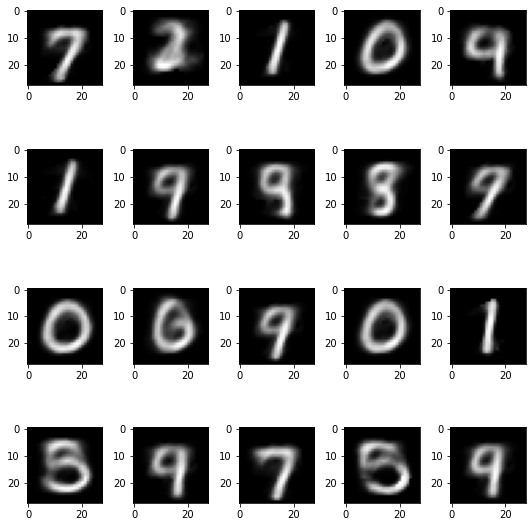

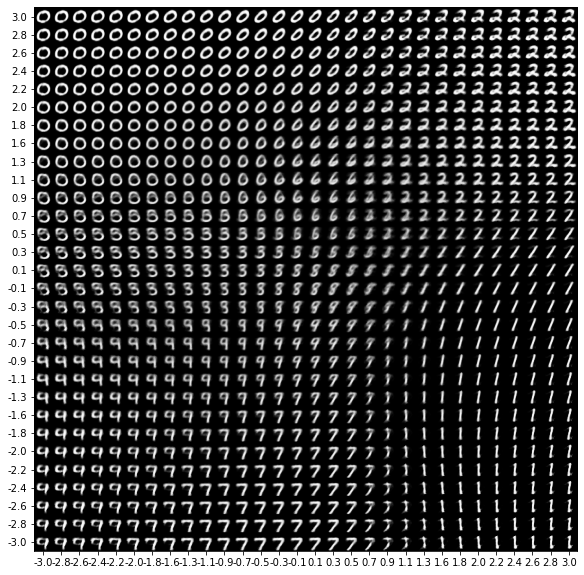

In [0]:
vae(2)

**Latent dimension = 8 with inference**

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 256)          200960      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 8)            2056        dense_4[0][0]                    
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 8)            2056        dense_4[0][0]                    
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.
  'be expecting any data to be passed to {0}.'.format(name))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 87us/step - loss: 48.6977 - val_loss: 37.4601
Epoch 2/30
60000/60000 [==============================] - 2s 31us/step - loss: 36.0367 - val_loss: 34.4933
Epoch 3/30
60000/60000 [==============================] - 2s 31us/step - loss: 34.1560 - val_loss: 33.4080
Epoch 4/30
60000/60000 [==============================] - 2s 31us/step - loss: 33.2848 - val_loss: 32.8089
Epoch 5/30
60000/60000 [==============================] - 2s 31us/step - loss: 32.7176 - val_loss: 32.2429
Epoch 6/30
60000/60000 [==============================] - 2s 31us/step - loss: 32.3065 - val_loss: 31.8801
Epoch 7/30
60000/60000 [==============================] - 2s 31us/step - loss: 31.9941 - val_loss: 31.6188
Epoch 8/30
60000/60000 [==============================] - 2s 31us/step - loss: 31.7411 - val_loss: 31.4212
Epoch 9/30
60000/60000 [==============================] - 2s 31us/step - loss: 31.5274 - val_l

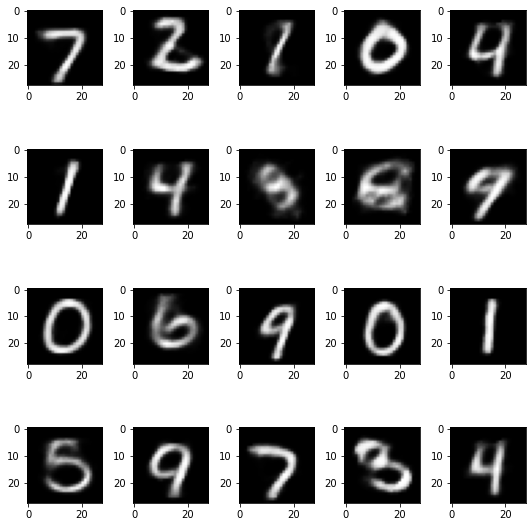

In [0]:
vae(8)

**Latent Dimension = 16 with inference**

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 256)          200960      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 16)           4112        dense_7[0][0]                    
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 16)           4112        dense_7[0][0]                    
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.
  'be expecting any data to be passed to {0}.'.format(name))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 89us/step - loss: 49.1055 - val_loss: 37.9954
Epoch 2/30
60000/60000 [==============================] - 2s 31us/step - loss: 36.0574 - val_loss: 34.4948
Epoch 3/30
60000/60000 [==============================] - 2s 31us/step - loss: 34.0080 - val_loss: 33.0597
Epoch 4/30
60000/60000 [==============================] - 2s 31us/step - loss: 32.9836 - val_loss: 32.2637
Epoch 5/30
60000/60000 [==============================] - 2s 31us/step - loss: 32.3784 - val_loss: 31.8259
Epoch 6/30
60000/60000 [==============================] - 2s 31us/step - loss: 31.9300 - val_loss: 31.5515
Epoch 7/30
60000/60000 [==============================] - 2s 31us/step - loss: 31.6044 - val_loss: 31.1808
Epoch 8/30
60000/60000 [==============================] - 2s 31us/step - loss: 31.3824 - val_loss: 30.9731
Epoch 9/30
60000/60000 [==============================] - 2s 31us/step - loss: 31.1824 - val_l

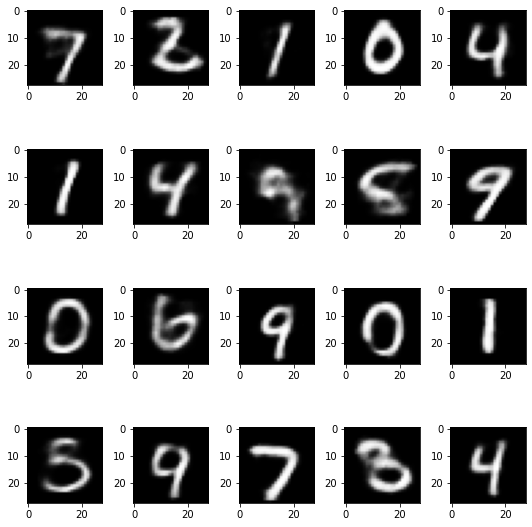

In [0]:
vae(16)

**Reference**

https://keras.io/examples/variational_autoencoder/

https://wiseodd.github.io/techblog/2016/12/10/variational-autoencoder/

# QUESTION 3

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import norm

import keras
from keras.datasets import mnist
from keras import layers
from keras.models import Model
from keras import metrics
from keras import backend as K   
K.clear_session()


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
# Only get some data to train and test
train_len = 10000
test_len = 1000
x_train = np.reshape(x_train[:train_len], [-1, image_size, image_size, 1])
x_test = np.reshape(x_test[:test_len], [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_test = y_test[:test_len]

In [0]:
img_shape = (28, 28, 1)    # for MNIST
batch_size = 16
latent_dim = 2  # Number of latent dimension parameters

# Encoder architecture: Input -> Conv2D*4 -> Flatten -> Dense
input_img = keras.Input(shape=img_shape)

x = layers.Conv2D(32, 3,
                  padding='same', 
                  activation='relu')(input_img)
x = layers.Conv2D(64, 3,
                  padding='same', 
                  activation='relu',
                  strides=(2, 2))(x)
x = layers.Conv2D(64, 3,
                  padding='same', 
                  activation='relu')(x)
x = layers.Conv2D(64, 3,
                  padding='same', 
                  activation='relu')(x)
# need to know the shape of the network here for the decoder
shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

# Two outputs, latent mean and (log)variance
z_mu = layers.Dense(latent_dim)(x)
z_log_sigma = layers.Dense(latent_dim)(x)

In [0]:
# sampling function
def sampling(args):
    z_mu, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mu)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mu + K.exp(z_log_sigma) * epsilon

# sample vector from the latent distribution
z = layers.Lambda(sampling)([z_mu, z_log_sigma])

In [0]:
# decoder takes the latent distribution sample as input
decoder_input = layers.Input(K.int_shape(z)[1:])

# Expand to 784 total pixels
x = layers.Dense(np.prod(shape_before_flattening[1:]),
                 activation='relu')(decoder_input)

# reshape
x = layers.Reshape(shape_before_flattening[1:])(x)

# use Conv2DTranspose to reverse the conv layers from the encoder
x = layers.Conv2DTranspose(32, 3,
                           padding='same', 
                           activation='relu',
                           strides=(2, 2))(x)
x = layers.Conv2D(1, 3,
                  padding='same', 
                  activation='sigmoid')(x)

# decoder model statement
decoder = Model(decoder_input, x)

# apply the decoder to the sample from the latent distribution
z_decoded = decoder(z)

In [0]:
# construct a custom layer to calculate the loss
class CustomVariationalLayer(keras.layers.Layer):

    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        # Reconstruction loss
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        # KL divergence
        kl_loss = -5e-4 * K.mean(1 + z_log_sigma - K.square(z_mu) - K.exp(z_log_sigma), axis=-1)
        return K.mean(xent_loss + kl_loss)

    # adds the custom loss to the class
    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        return x

# apply the custom loss to the input images and the decoded latent distribution sample
y = CustomVariationalLayer()([input_img, z_decoded])

In [0]:
# VAE model statement
vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)
vae.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 14, 14, 64)   36928       conv2d_2[0][0]                   
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output custom_variational_layer_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to custom_variational_layer_1.
  'be expecting any data to be passed to {0}.'.format(name))


In [0]:
vae.fit(x=x_train, y=None,
        shuffle=True,
        epochs=20,
        batch_size=batch_size,
        validation_data=(x_test, None))

Train on 10000 samples, validate on 1000 samples
Epoch 1/20
10000/10000 [==============================] - 4s 352us/step - loss: 0.2569 - val_loss: 0.2147
Epoch 2/20
10000/10000 [==============================] - 3s 335us/step - loss: 0.2141 - val_loss: 0.2054
Epoch 3/20
10000/10000 [==============================] - 3s 329us/step - loss: 0.2075 - val_loss: 0.2012
Epoch 4/20
10000/10000 [==============================] - 3s 328us/step - loss: 0.2032 - val_loss: 0.2007
Epoch 5/20
10000/10000 [==============================] - 3s 322us/step - loss: 0.1999 - val_loss: 0.1985
Epoch 6/20
10000/10000 [==============================] - 3s 325us/step - loss: 0.1970 - val_loss: 0.1972
Epoch 7/20
10000/10000 [==============================] - 3s 328us/step - loss: 0.1946 - val_loss: 0.1938
Epoch 8/20
10000/10000 [==============================] - 3s 326us/step - loss: 0.1926 - val_loss: 0.1937
Epoch 9/20
10000/10000 [==============================] - 3s 325us/step - loss: 0.1908 - val_loss: 0.19

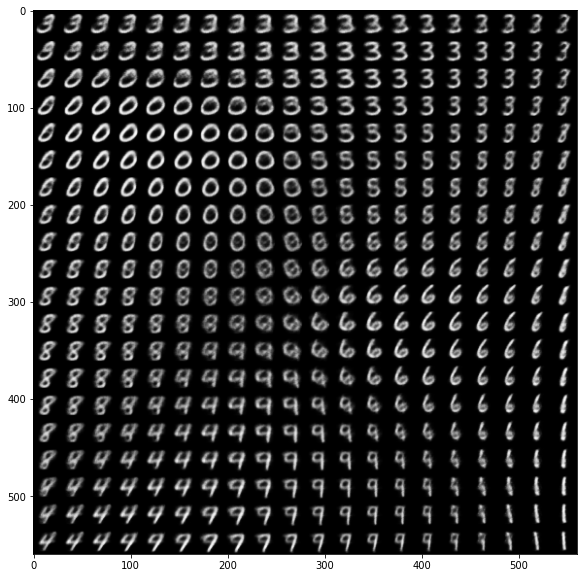

In [0]:
# Display a 2D manifold of the digits
n = 20  # figure with 20x20 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

# Construct grid of latent variable values
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

# decode for each square in the grid
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = decoder.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='gist_gray')
plt.show()  


**Reference:**

https://www.kaggle.com/rvislaywade/visualizing-mnist-using-a-variational-autoencoder

# QUESTION 4

The Generative Adversarial Network (GAN) comprises of two models: a generative model G and a discriminative model D.

Discriminator distinguishes between actual and generated (fake) data.
Generator creates data in such a way that it can fool the discriminator.

We will be using cross entropy loss:

$L(y,\hat{y})=(y \log \hat{y})+((1-y) \log (1-\hat{y}))$

While training discriminator the label of data coming from $P_{data}(x)$ is y=1 and $\hat{y}= D(x)$ thus the loss we get is:

$L(D(x),1)= \log(D(x))$

But for generator the data is fake so y=0 and $\hat{y}= D(G(z))$

So $L(D(G(z)),0)= \log(1-D(G(z)))$

Objective of discriminator is to classify real and fake data so,

**Loss function for Discriminator is:**

$L^{(D)}=max[\log(D(x))+\log(1-D(G(z)))]$

Since generator is competing against discriminator,

**Loss function for Generator is:**

$L^{(G)}=min[\log(D(x))+\log(1-D(G(z)))]$

Thus the **combined loss function** of the entire dataset is:

$L=min_{G} max_{D} [E_{x \sim P_{data}(x) }[\log(D(x))]+ E_{z\sim P(z)}[\log(1-D(G(z)))]]$

Now we can update the discriminator by ascending its stochastic gradient descent and update the generator by descending its stochastic gradient descent.




In [0]:
import tensorflow as tf

In [0]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display

In [0]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [0]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

In [0]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [0]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [0]:
generator = make_generator_model()
discriminator=make_discriminator_model()

In [0]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [0]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [0]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [0]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
   
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
 
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [0]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

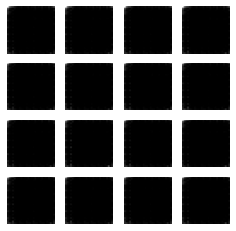

Time for epoch 1 is 7.805944442749023 sec


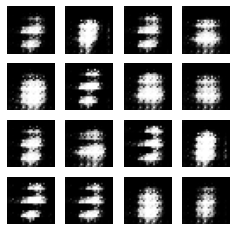

Time for epoch 2 is 6.357346057891846 sec


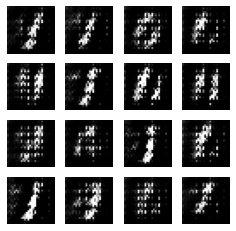

Time for epoch 3 is 6.220192909240723 sec


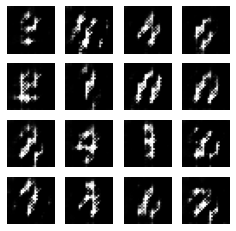

Time for epoch 4 is 6.191904783248901 sec


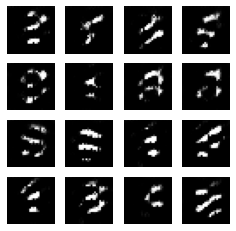

Time for epoch 5 is 6.189312934875488 sec


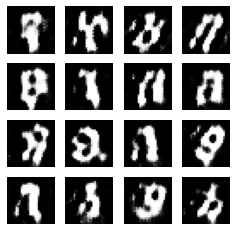

Time for epoch 6 is 6.406456470489502 sec


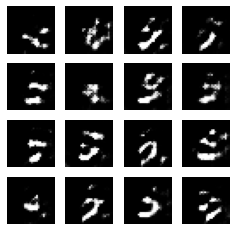

Time for epoch 7 is 6.206688404083252 sec


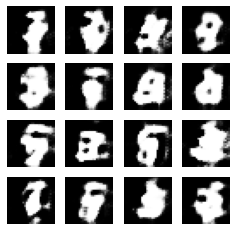

Time for epoch 8 is 6.214594602584839 sec


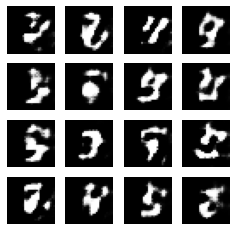

Time for epoch 9 is 6.196758031845093 sec


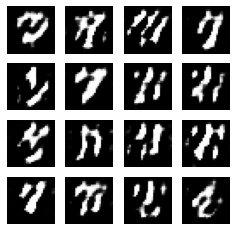

Time for epoch 10 is 6.384528875350952 sec


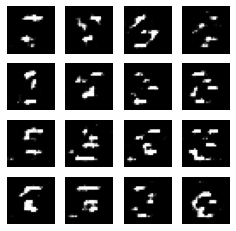

Time for epoch 11 is 6.205608129501343 sec


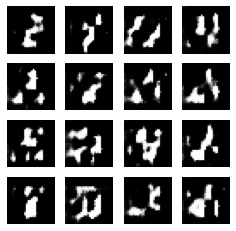

Time for epoch 12 is 6.205147981643677 sec


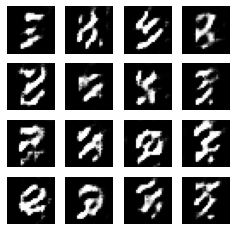

Time for epoch 13 is 6.388862133026123 sec


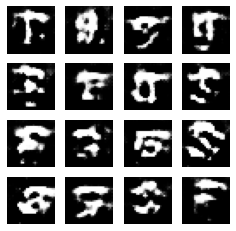

Time for epoch 14 is 6.210578203201294 sec


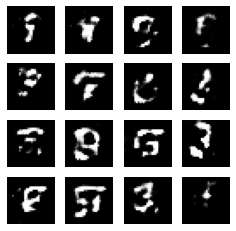

Time for epoch 15 is 6.272535800933838 sec


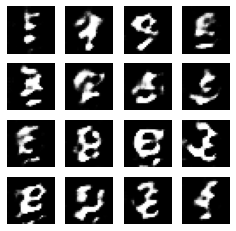

Time for epoch 16 is 6.206394195556641 sec


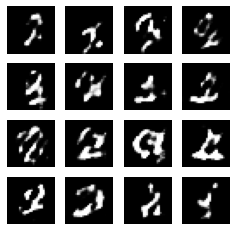

Time for epoch 17 is 6.399573802947998 sec


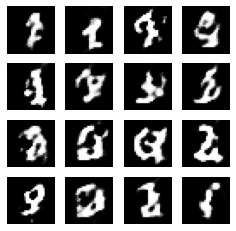

Time for epoch 18 is 6.221530437469482 sec


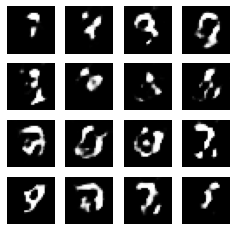

Time for epoch 19 is 6.1885151863098145 sec


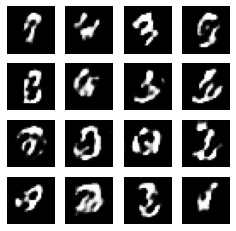

Time for epoch 20 is 6.203254461288452 sec


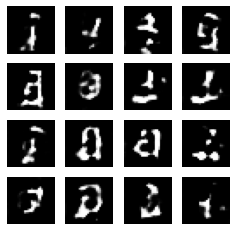

Time for epoch 21 is 6.406499147415161 sec


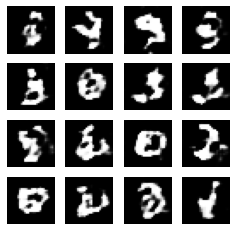

Time for epoch 22 is 6.206488370895386 sec


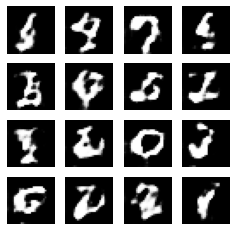

Time for epoch 23 is 6.215987920761108 sec


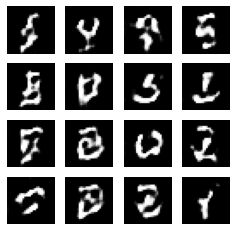

Time for epoch 24 is 6.377680540084839 sec


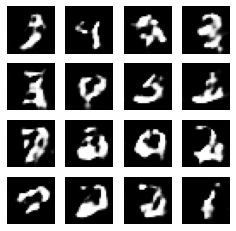

Time for epoch 25 is 6.218930244445801 sec


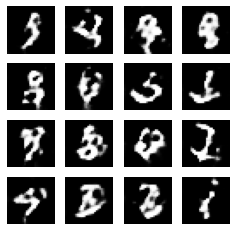

Time for epoch 26 is 6.208741903305054 sec


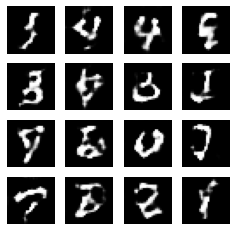

Time for epoch 27 is 6.191080808639526 sec


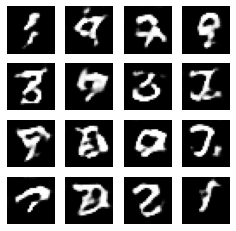

Time for epoch 28 is 6.3837056159973145 sec


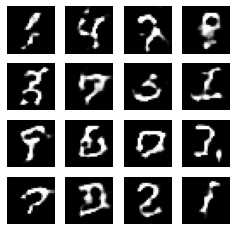

Time for epoch 29 is 6.200464963912964 sec


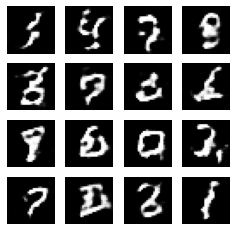

Time for epoch 30 is 6.292943000793457 sec


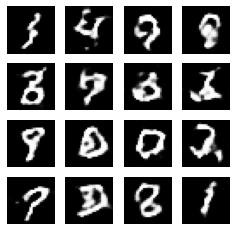

Time for epoch 31 is 6.195308685302734 sec


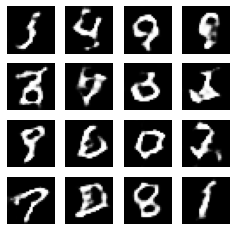

Time for epoch 32 is 6.44429612159729 sec


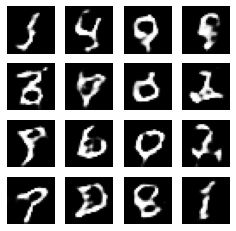

Time for epoch 33 is 6.248105525970459 sec


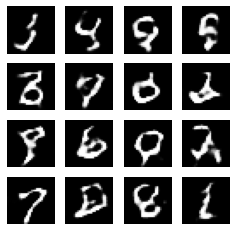

Time for epoch 34 is 6.216661214828491 sec


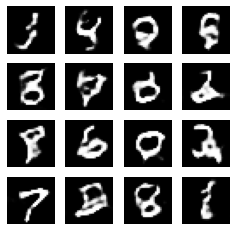

Time for epoch 35 is 6.373068571090698 sec


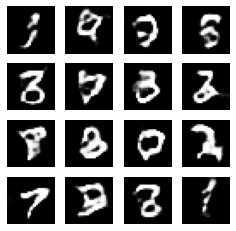

Time for epoch 36 is 6.212740182876587 sec


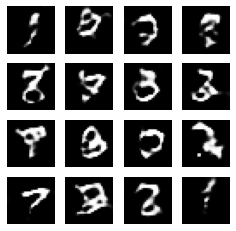

Time for epoch 37 is 6.196722507476807 sec


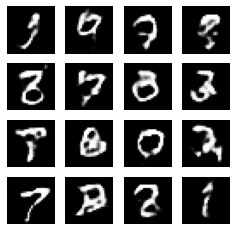

Time for epoch 38 is 6.202680826187134 sec


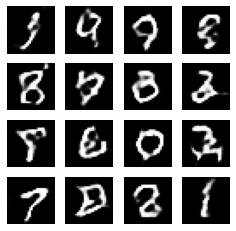

Time for epoch 39 is 6.370192050933838 sec


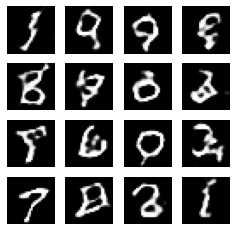

Time for epoch 40 is 6.1999146938323975 sec


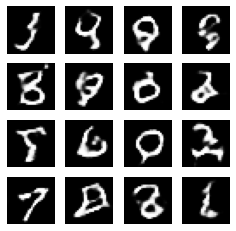

Time for epoch 41 is 6.180597543716431 sec


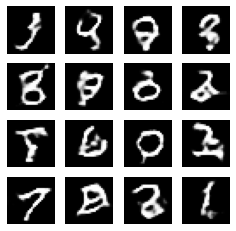

Time for epoch 42 is 6.186472415924072 sec


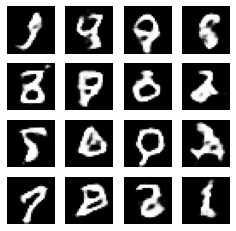

Time for epoch 43 is 6.3593971729278564 sec


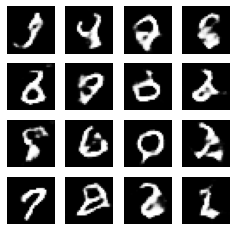

Time for epoch 44 is 6.185031175613403 sec


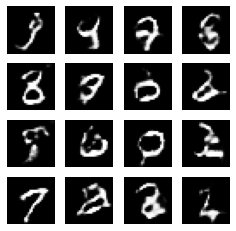

Time for epoch 45 is 6.256989240646362 sec


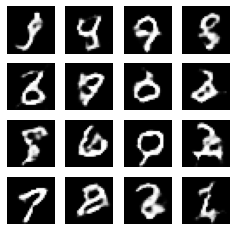

Time for epoch 46 is 6.192914009094238 sec


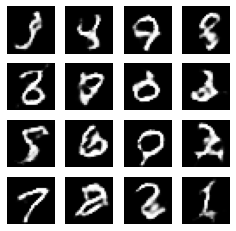

Time for epoch 47 is 6.361056804656982 sec


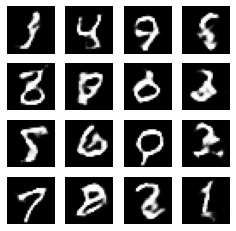

Time for epoch 48 is 6.19738507270813 sec


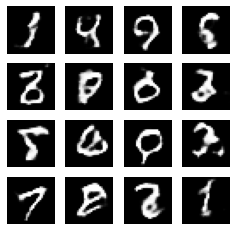

Time for epoch 49 is 6.1968834400177 sec


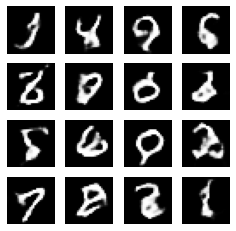

Time for epoch 50 is 6.358672618865967 sec


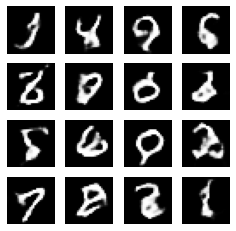

In [0]:
train(train_dataset, EPOCHS)

**Reference:**

https://www.tensorflow.org/tutorials/generative/dcgan